# Diabetes Dataset

PACKAGES

pandas
matplotlib
scikit-learn

## Introduction

**Learning Objectives**
- Apply what we've learned to the diabetes dataset.

We now return to the dataset that began our enquiry into DataFrames in the previous lesson. Let us apply the above, and perform a summary analysis of its bivariate features.

## Loading

First we import our packages and load in our data into our workspace.

In [6]:
from sklearn import datasets

from numpy import corrcoef, fill_diagonal, triu_indices, arange, abs, mean

from matplotlib.pyplot import subplots, show

In [7]:
diabetes = datasets.load_diabetes()
data_diabetes = diabetes.data

## Application

For the bivariate features, let us get the correlation matrix and plot it as a heatmap. We can make use of code that introduced above.

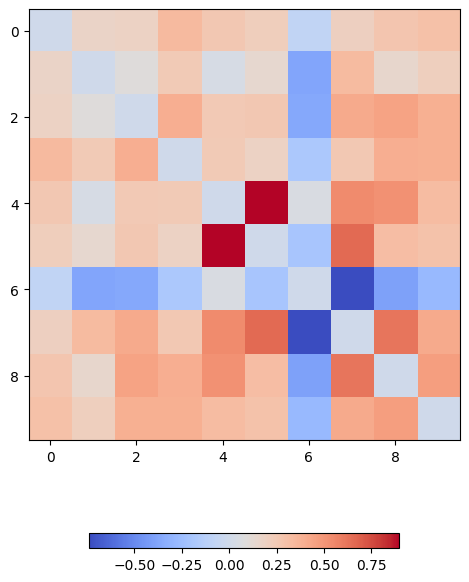

In [8]:
data_corr_matrix = corrcoef(data_diabetes, rowvar=False)

fill_diagonal(data_corr_matrix, 0)

fig, ax = subplots(figsize=(8, 8))

im = ax.imshow(data_corr_matrix, cmap='coolwarm');

fig.colorbar(im, orientation='horizontal', shrink=0.5);

show()

There is one strongly correlated pair (column indices 4 and 5) and one strongly anti-correlated pair (column indices 6 and 7).

Let's calculate the correlation coefficients and plot them as a histogram:

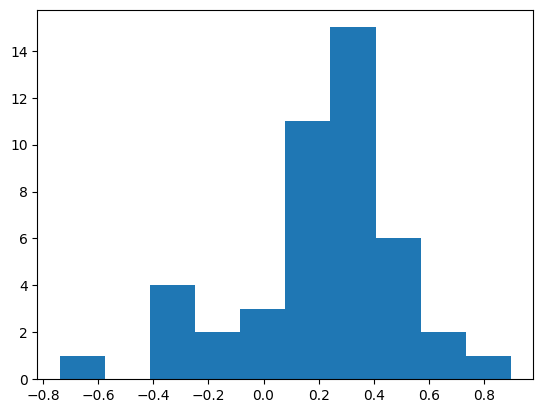

In [9]:
data_corr_coeffs = data_corr_matrix[triu_indices(data_corr_matrix.shape[0], k=1)]

fig, ax = subplots()

ax.hist(data_corr_coeffs, bins=10);

show()

This histogram shows that the data have a distribution that is shifted towards positive correlations. However, only four values are (absolutely) larger than 0.5 (three positive, one negative).

Next, let's obtain the average (absolute) correlation per column.

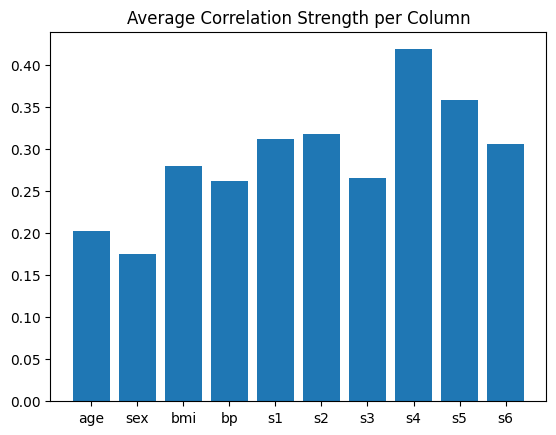

In [10]:
data_column_average = mean(abs(data_corr_matrix), axis=0)

fig, ax = subplots()

bins = arange(len(data_column_average))

ax.bar(bins, data_column_average);
ax.set_title('Average Correlation Strength per Column')
ax.set_xticks(arange(len(diabetes.feature_names)))
ax.set_xticklabels(diabetes.feature_names);

show()

In the plot, note how the column names were extracted from the 'diabetes' data using `diabetes.feature_names`.

Finally, let's obtain the average correlation of the entire dataset.

In [11]:
# Average of the correlation strengths
data_corr_matrix_average = mean(abs(data_corr_matrix))

print('Average Correlation Strength: ', round(data_corr_matrix_average, 3))

Average Correlation Strength:  0.29


## Summary

When you're working with quantities derived from two variables, these are called bivariate measures. You can explore and visualise bivariate properties using matplotlib and NumPy. More broadly, multivariate data analyses are useful for uncovering relationships between the variables you've recorded. For calculating the Pearson correlation coefficient (PCC), you can use either the corr or corrcoef functions, and if you want to visualise a correlation matrix, a heatmap works well for that.